<a href="https://colab.research.google.com/github/mcallara/probabilistic-forecasting-for-planning-101/blob/main/Part_II_Practical_Application_%5BStephanie_Brueckner%5D_%5BParticipants_Version%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application of Probabilistic Forecasting

## Introduction

Welcome to the practical segment of our workshop on probabilistic forecasting! In this part of the workshop, we'll dive into the hands-on application of probabilistic forecasting techniques using real-world data.

Let's start by setting the scene:
Imagine you're part of a pharmaceutical sales affiliate tasked with optimizing inventory management to ensure product availability while mitigating the risks of stockouts and overstock.

As a sales affiliate, you're constantly faced with the challenge of forecasting future sales accurately. Traditional point forecasting methods provide a single estimate of future demand, but they fail to capture the inherent uncertainty in sales predictions. This uncertainty can lead to costly mistakes in inventory management decisions.

That's where probabilistic forecasting comes in. Instead of providing a single point estimate, probabilistic forecasting offers a range of possible outcomes along with their associated probabilities. By understanding the range of potential outcomes and their likelihoods, you can make more informed decisions and better manage the risks associated with inventory planning.

In this segment of the workshop, we'll walk through a step-by-step process of implementing probabilistic forecasting techniques using Python and the Darts library. We'll start by exploring and preparing our sales data, gaining insights into the patterns and trends that drive sales fluctuations. Then, we'll introduce the Darts library and demonstrate how to set up simple point forecasts using techniques like Exponential Smoothing.

But we won't stop there. We'll highlight the limitations of point forecasts and introduce the concept of uncertainty estimation. We'll show you how to train probabilistic forecasting models using Darts, allowing you to quantify the uncertainty surrounding your sales predictions.

By the end of this session, you'll be equipped with the skills and knowledge to apply probabilistic forecasting techniques in your own forecasting tasks, enabling you to make more informed decisions and optimize your inventory management processes.

So let's dive in and start uncovering the power of probabilistic forecasting!

## Set Up Workspace

In this section, we will set up the workspace by loading the necessary packages and modules and reading in the data.

In [ ]:
# install darts package
!pip install darts==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 

In [ ]:
# import necessary libraries
import darts

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px


from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models import NaiveSeasonal
from darts.models import NBEATSModel
from darts.models import RNNModel
from darts.models import TCNModel
from darts.models import TransformerModel
from darts.utils.likelihood_models import PoissonLikelihood
from darts.utils.likelihood_models import QuantileRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# load the dataset
!git clone https://github.com/mcallara/pharma-sales-data

# read data
df_raw = pd.read_csv("pharma-sales-data/salesweekly.csv", parse_dates=["datum"])

Cloning into 'pharma-sales-data'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 351.17 KiB | 1.60 MiB/s, done.


## Data Cleaning and Preparation

In this section, we will clean and prepare the dataset to ensure it is ready for analysis and forecasting.

**Task**
<br>
*Explore the dataset by printing basic information about the dataset using the .info() method, display the first rows of the dataset (using the .head() method) and check for missing values (.isnull().sum()) and duplicates (.duplicated().sum()).*

In [ ]:
# display basic information about the dataset
print("Basic information about the dataset:")
#print(...)

# display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
#print(...)

# check for missing values
print("\nMissing values:")
#print(...)

# Check for duplicates
print("\nDuplicates:")
#print(...)

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   302 non-null    datetime64[ns]
 1   M01AB   302 non-null    float64       
 2   M01AE   302 non-null    float64       
 3   N02BA   302 non-null    float64       
 4   N02BE   302 non-null    float64       
 5   N05B    302 non-null    float64       
 6   N05C    302 non-null    float64       
 7   R03     302 non-null    float64       
 8   R06     302 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 21.4 KB
None

First few rows of the dataset:
       datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0 2014-01-05  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1 2014-01-12  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2 2014-01-19  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3 2014-01-26  

**Task** <br>
*Run the following code in order to plot the data.*

In [ ]:
# plot data
df_melted = df_raw.melt(id_vars="datum", var_name="unique_id", value_name="sold_qty")

fig = px.line(df_melted, x="datum", y="sold_qty", color="unique_id",
              title="Sales over Time", labels={"sold_qty": "Sold Qty"})
fig.show()


**Task**
<br>
*Describe the dataset in your own words. What does it contain? Also consider the data source to better understand what these columns mean: https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data/data?select=salesweekly.csv*

**Answer** <br>
*Add your answer here*

### Subset Data to Single Drug Category

To start with, we are interested in analyzing sales volume of antihistamines for systemic use, which are shown in column "R06".

In [ ]:
# create subset of dataset
drug_group = "R06"
df = df_raw[["datum", drug_group]].reset_index(drop=True).copy()

# transform the dataset, rename columns, sort dataset
df.rename(columns={
    "datum":"date",
    drug_group:"sold_qty"
}, inplace=True)

# add unique_id
df.insert(1,"unique_id", drug_group)

df.sort_values(by="date", inplace=True)

In [ ]:
# check data types
df.info()
df["date"] = pd.to_datetime(df["date"])

# sort by date
df.sort_values(by="date",inplace=True)

# check if dates follow weekly pattern
time_diffs = df['date'].diff().dt.days
if (time_diffs[1:] == 7.0).all():
    print("There are always 7 days between each row in the dataset.")
else:
    print("There might be deviations from the expected 7-day interval between rows.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       302 non-null    datetime64[ns]
 1   unique_id  302 non-null    object        
 2   sold_qty   302 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.4+ KB
There are always 7 days between each row in the dataset.


In [ ]:
# summary after data cleaning
print("\nSummary after data cleaning:")
print(df["date"].describe(datetime_is_numeric=True))
print(df["unique_id"].describe())
print(df["sold_qty"].describe())


Summary after data cleaning:
count                    302
mean     2016-11-23 12:00:00
min      2014-01-05 00:00:00
25%      2015-06-15 18:00:00
50%      2016-11-23 12:00:00
75%      2018-05-04 06:00:00
max      2019-10-13 00:00:00
Name: date, dtype: object
count     302
unique      1
top       R06
freq      302
Name: unique_id, dtype: object
count    302.000000
mean      20.224561
std       11.381464
min        1.000000
25%       11.475000
50%       17.500000
75%       26.000000
max       65.000000
Name: sold_qty, dtype: float64


## Data Exploration

In this section, we will explore the dataset to gain insights into the time series data for the 'R06' drug group.

**Task** <br>
*Run the following code in order to plot the data.*

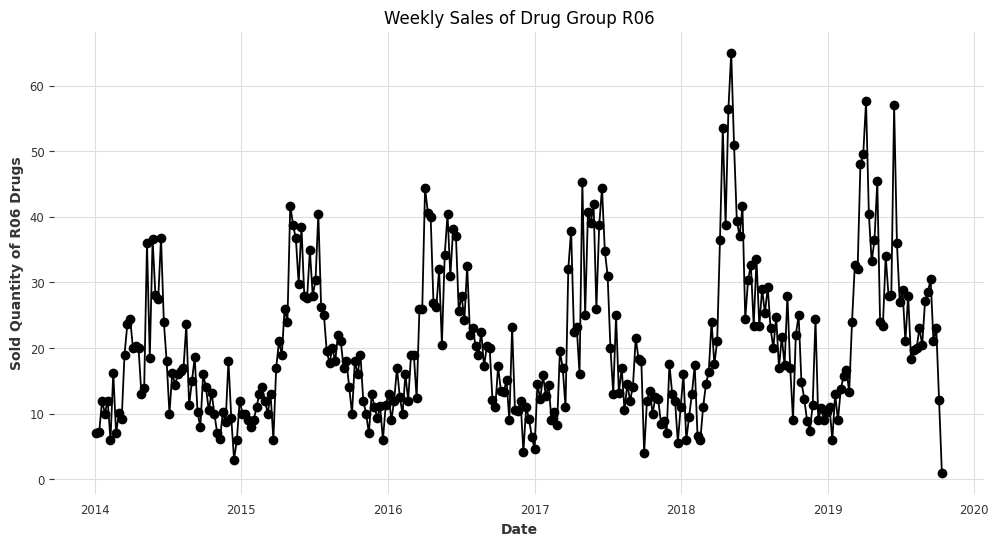

In [ ]:
# plot
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["sold_qty"], marker="o", linestyle="-")
plt.title("Weekly Sales of Drug Group R06")
plt.xlabel("Date")
plt.ylabel("Sold Quantity of R06 Drugs")
plt.grid(True)
plt.show()

**Task** <br>
*Describe what you can see from the plot. Do you see a trend? Is there seasonality?*

**Answer** <br>
*Add your answer here*

### Decomposition

To analyze trend and seasonality, we decompose the time series.

Time series decomposition is a statistical method used to break down a time series data into its individual components, typically trend, seasonality, and randomness. The trend component represents the long-term direction or overall pattern in the data. Seasonality captures the periodic fluctuations or patterns that repeat at regular intervals within the data, while randomness (also known as residual or error) accounts for the unpredictable variations not explained by trend or seasonality.

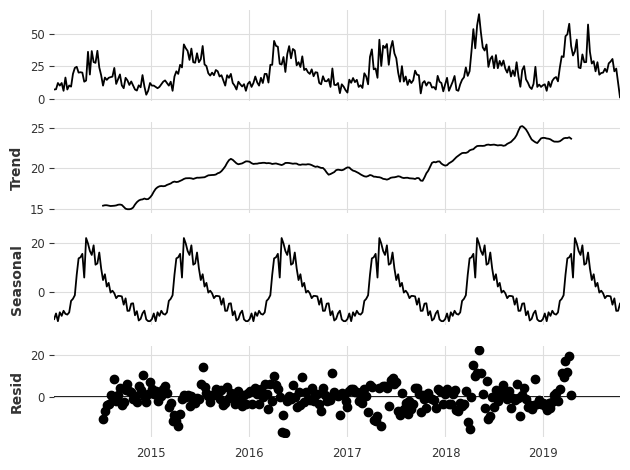

In [ ]:
# decompose time series to check for seasonality and trend
decomposed_ts = seasonal_decompose(df[["date","sold_qty"]].set_index("date"), model='additive')
decomposed_ts.plot()
plt.show()

**Task** <br>
*Describe whether and if yes, how the decomposition confirms the trends and seasonality anticipated in the previous question.*

**Answer** <br>
*Add your answer here*

## Introduction to Darts

We now have cleaned, preprocessed, and explored the time series. Next, we will now shift our focus to creating forecasts using the Darts library. Harnessing the power of Darts, we can leverage cutting-edge forecasting models and intuitive tools to generate accurate predictions for our time series data.

Darts is an open-source library developed by Unit8 for easy manipulation and forecasting of time series data in Python. With a user-friendly interface and powerful functionality, Darts simplifies the process of time series analysis, making it accessible to both beginners and experienced data scientists alike. Whether you're exploring trends, forecasting future values, or evaluating model performance, Darts provides a comprehensive toolkit to streamline your workflow.

To learn more about Darts and start exploring its capabilities, visit the official website: [Darts](https://unit8.com/darts-open-source/) or the [Darts Documentation](https://unit8co.github.io/darts/README.html).

## Forecasting Preparation Using Darts TimeSeries Objects (incl. Train - Test Split)

To represent time series, Darts provides the TimeSeries class. It represents a univariate or multivariate time series, deterministic or probabilistic.

Here are definitions for univariate time series, multivariate time series, deterministic time series, and probabilistic time series:

*   Univariate Time Series: A univariate time series consists of a single dimension or variable measured at successive time intervals. For example, daily temperature recordings over a month stored as a series with dimensions = 1 would be considered univariate.
*   Multivariate Time Series: A multivariate time series comprises multiple interrelated dimensions or variables measured at successive time points. For instance, a dataset containing both temperature and humidity levels recorded daily over a month, stored as a series with dimensions > 1, would be classified as multivariate.
*   Deterministic Time Series: In Darts, a deterministic time series is characterized by having only one sample per dimension, representing a clear and predictable pattern or relationship between variables. Point forecasts are examples of deterministic time series.
*   Probabilistic / Stochastic Time Series: A probabilistic time series in Darts has multiple samples per dimension, introducing randomness or uncertainty into its behavior. For example, a probabilistic time series could be the forecast of daily sales volume of a retail store, where samples > 1 capture the variability influenced by external factors i.e. a probabilistic forecast.

More information on TimeSeries can be found in the [Darts documentation](https://unit8co.github.io/darts/generated_api/darts.timeseries.html).











To produce our forecasts, we have to first convert the dataframe into a time series element.

In [ ]:
# transform to time series
ts = TimeSeries.from_dataframe(df, "date", "sold_qty")

Let's explore the time series element we have created by looking into the time series' attributes followed by subsequent plotting of the time series.

**Task** <br>
*Explore the time series object. Fill in the following missing pieces in code. Make use of the Darts documentation if needed.*

In [ ]:
print("Columns of the time series:")
# print(...)

print("\nComponents of the time series:")
# print(...)

print("\nData type of the time series values:")
# print(...)

print("\nFrequency of the time series:")
# print(...)

print("\nWhether the time series has a datetime index:")
# print(...)

print("\nWhether the time series has static covariates:")
# print(...)

print("\nWhether the time series is deterministic:")
# print(...)

print("\nWhether the time series is probabilistic:")
# print(...)

print("\nNumber of samples in the time series:")
# print(...)

print("\nWhether the time series is univariate:")
# print(...)

print("\nNumber of components in the time series:")
# print(...)

print("\nNumber of timesteps in the time series:")
# print(...)


Columns of the time series:
Index(['sold_qty'], dtype='object', name='component')

Components of the time series:
Index(['sold_qty'], dtype='object', name='component')

Data type of the time series values:
float64

Frequency of the time series:
<Week: weekday=6>

Whether the time series has a datetime index:
True

Whether the time series has static covariates:
False

Whether the time series is deterministic:
True

Whether the time series is probabilistic:
False

Number of samples in the time series:
1

Whether the time series is univariate:
True

Number of components in the time series:
1

Number of timesteps in the time series:
302


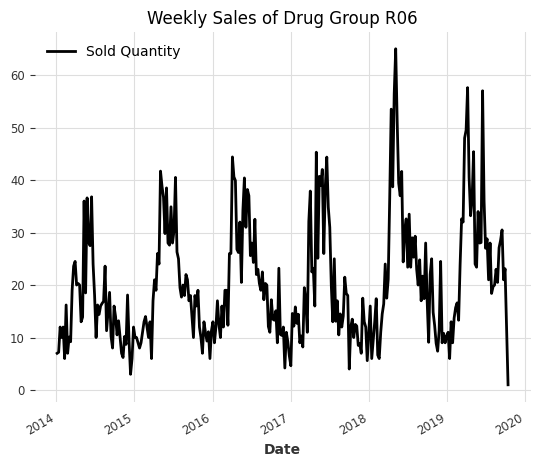

In [ ]:
# plot time series
ts.plot(label="Sold Quantity")
plt.title("Weekly Sales of Drug Group R06")
plt.xlabel("Date")
plt.show()

Darts' TimeSeries objects offer a plethora of methods for time series analysis, including forecasting, anomaly detection, and model evaluation. The plot method that we used above enables easy visualization of time series data and model outputs.

Notably, the resample method facilitates downsampling or upsampling of time series data, enabling conversion between different frequencies effortlessly. For example, ts_resampled = ts.resample('M') resamples the time series ts to a monthly frequency.

Moreover, the split_before method is invaluable for generating train-test splits in time series analysis, enabling users to partition data based on a specified timestamp. For example, train, test = ts.split_before(pd.Timestamp('2024-01-01')) splits the time series ts into training data up to January 7, 2024, and test data thereafter.

Splitting a time series into training and test sets is crucial for evaluating the performance and generalization ability of forecasting models. By withholding a portion of the data for testing, we can assess how well the model performs on unseen future observations, which helps in detecting overfitting and ensuring the model's reliability. This approach simulates real-world scenarios where the model is deployed to make predictions on new data.

In our example, we'll split the data with the last year as the test set to assess the model's performance on future observations.

**Task** <br>
*Perform a train-test split by splitting the data on Jan 1st 2019. All data before that should belong to the training set. All data after that should belong to the test set.
Print the number of time steps in the training series as well as the number of time steps in the test series.*

In [ ]:
# create train and test split
#train, test = ...

print("\nNumber of timesteps in training series:")
#print(...)

print("\nNumber of timesteps in test series:")
#print(...)


Number of timesteps in training series:
261

Number of timesteps in test series:
41


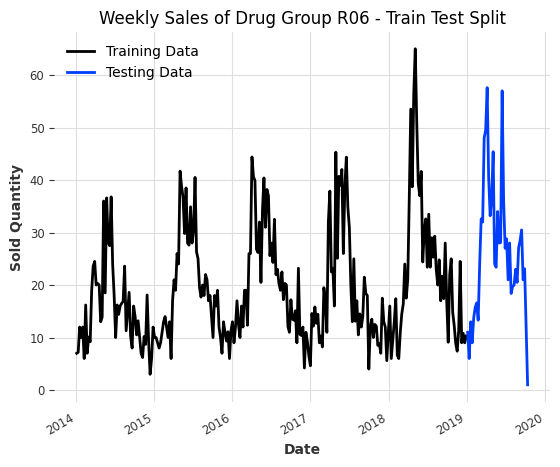

In [ ]:
# plot train test split
train.plot(label="Training Data")
test.plot(label="Testing Data")
plt.title("Weekly Sales of Drug Group R06 - Train Test Split")
plt.xlabel("Date")
plt.ylabel("Sold Quantity")
plt.legend()
plt.show()

Now equipped with our train-test split, we are ready to embark on the creation of our first forecasting models. Leveraging the training data, we will develop predictive models capable of forecasting future data points.

## Train Point Forecasting Models

As a first step, we will create a point forecast by employing a simple yet effective method known as NaiveSeasonal. In essence, this approach involves forecasting future time steps by simply predicting future time steps based on the value of the previous observation from the same season.

For NaiveSeasonal, the parameter "K" can be set, which represents the seasonal period. In a first run, we will set "K" to 1, which means that we are considering a seasonal period of 1, meaning we use the value of the previous observation from the same time in the previous season as our forecast for the current time step. This basic approach provides a starting point for forecasting and establishes a baseline for evaluating more sophisticated models.

When creating a prediction, we will predict for the number of time steps that we have in our test set, which equals 41.

<Axes: xlabel='date'>

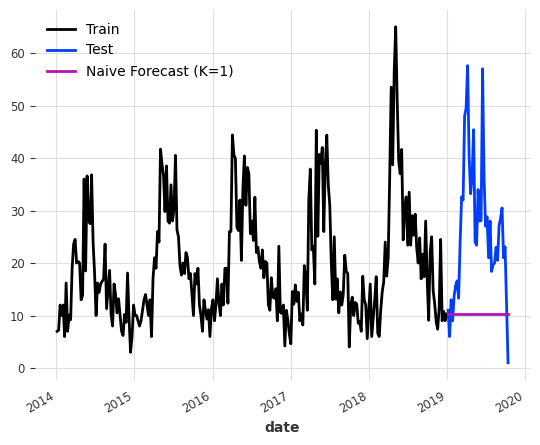

In [ ]:
# start with very naive forecast
naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(41)

train.plot(label="Train")
test.plot(label="Test")
naive_forecast.plot(label="Naive Point Forecast (K=1)")

As we can see, the forecast is not very accurate yet. We can enhance the effectiveness of the NaiveSeasonal method by adjusting the seasonal period parameter (K) to a more appropriate value. Given that our data is recorded weekly, setting K to 52 would align with the yearly seasonal pattern, allowing the model to capture recurring patterns across different seasons. This adjustment enables us to refine our forecasting accuracy and better adapt to the underlying seasonality present in the time series data. We will proceed with this refinement in the subsequent steps to improve the performance of our forecasting models.

<Axes: xlabel='date'>

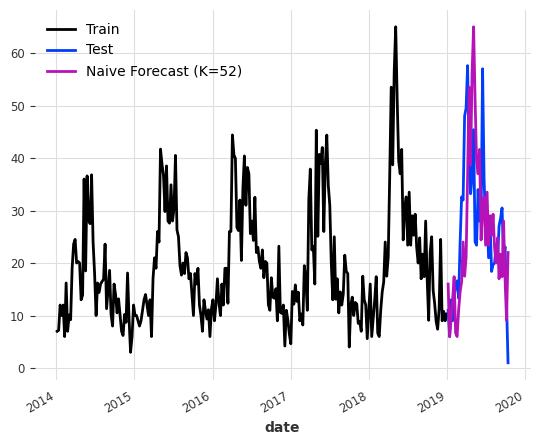

In [ ]:
# start with very naive forecast
naive_model = NaiveSeasonal(K=52)
naive_model.fit(train)
naive_forecast = naive_model.predict(41)

train.plot(label="Train")
test.plot(label="Test")
naive_forecast.plot(label="Naive Point Forecast (K=52)")

We can see that this prediction already lies much closer to the actual data captured in the test set.

In our quest to enhance forecasting accuracy, we now turn to the implementation of Exponential Smoothing. This method is particularly valuable for its ability to capture trends and seasonality in time series data while simultaneously adapting to changes over time. By assigning exponentially decreasing weights to older observations, Exponential Smoothing prioritizes recent data points, making it adept at handling noisy or irregular data. This flexibility allows the model to provide reliable forecasts even in the presence of fluctuations and outliers. Therefore, integrating Exponential Smoothing into our forecasting framework offers a robust solution for capturing both short-term fluctuations and long-term trends within the time series data.

**Task** <br>
*Train an Exponential Smoothing model on the training data. Create a prediction for the length of the test set. Plot train and test set along with the forecast*


<Axes: xlabel='date'>

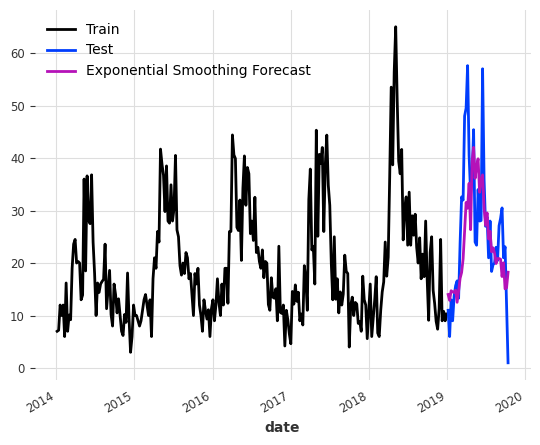

In [ ]:
# Exponential Smoothing
#model_es_point = ...

# train model
#model_es_point...

# create prediction
#pred_es_point = ...

# plot results
# ...
# label = "Exponential Smoothing Point Forecast"

Moving forward, we will introduce N-BEATS (Neural Basis Expansion Analysis Time Series) into our forecasting arsenal. N-BEATS is a state-of-the-art deep learning architecture designed explicitly for time series forecasting tasks. Unlike traditional statistical methods, N-BEATS leverages the power of neural networks to automatically learn complex patterns and relationships within the data, enabling it to capture nonlinearities and interactions that may be challenging for conventional methods to detect. With its ability to handle large-scale datasets and high-dimensional features, N-BEATS offers a scalable and efficient solution for forecasting tasks across various domains. By harnessing the capabilities of deep learning, N-BEATS provides a versatile framework for accurate and robust forecasting, making it an ideal choice for our forecasting endeavors.







INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
25.662    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

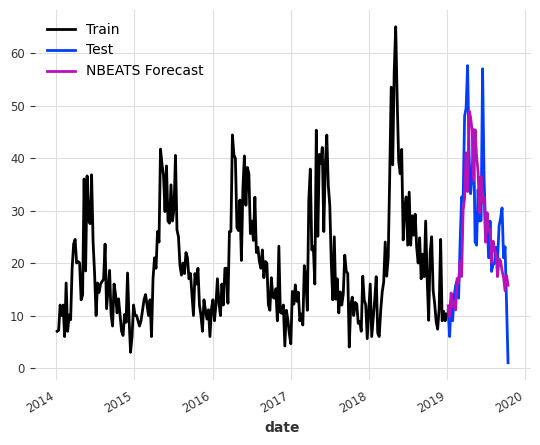

In [ ]:
# NBEATS
model_nbeats_point = NBEATSModel(input_chunk_length=52, output_chunk_length=4)
model_nbeats_point.fit(train, epochs=5, verbose=True)

pred_neats_point = model_nbeats_point.predict(41)

train.plot(label="Train")
test.plot(label="Test")
pred_neats_point.plot(label='NBEATS Point Forecast')


Having trained NaiveSeasonal models with seasonal periods K=1 and K=52, as well as an Exponential Smoothing model and N-BEATS, we have generated four individual (univariate) point predictions for 41 future time steps each. To explore the nature of these predictions, we now examine the Darts TimeSeries object containing the predictions made using NBEATS.

In [ ]:
# print prediction
pred_neats_point

<TimeSeries (DataArray) (date: 41, component: 1, sample: 1)>
array([[[11.85843612]],

       [[ 9.80027933]],

       [[14.30423016]],

       [[11.69645597]],

       [[12.7612139 ]],

       [[11.05578087]],

       [[17.04595442]],

       [[16.11021611]],

       [[20.35214714]],

       [[17.4476668 ]],

...

       [[22.55416131]],

       [[21.6348798 ]],

       [[17.40869803]],

       [[20.80904334]],

       [[20.39333514]],

       [[18.54307197]],

       [[17.30454502]],

       [[14.73473823]],

       [[17.60171595]],

       [[15.77225343]]])
Coordinates:
  * date       (date) datetime64[ns] 2019-01-06 2019-01-13 ... 2019-10-13
  * component  (component) object 'sold_qty'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

This object contains the point forecasts produced by NBEATS, offering insights into the expected values for each time step in the forecast horizon.

We have seen that we can already reach quite good results compared to our test set. However, when creating actual future predictions, there is no test set, where we can compare our forecast to, meaning that we have to be able to completely trust our forecast. But as we saw, there are often differences to the real world - so how could we know how well we can trust a forecast?
Without a benchmark for comparison, it becomes crucial to establish a method for quantifying the uncertainty associated with our predictions. Probabilistic forecasting offers a solution to this challenge by providing a range of possible outcomes along with associated probabilities. By incorporating uncertainty into our forecasts, probabilistic methods enable us to assess the confidence level of our predictions and make more informed decisions in the face of uncertainty. Thus, we are now delving into probabilistic forecasting methods to enhance the reliability and trustworthiness of our future predictions.

## Train Probabilistic Forecasting Models

Certain models within Darts are capable of generating probabilistic forecasts. When utilizing these models, the TimeSeries object returned by the predict() function will be probabilistic, containing a specified number of Monte Carlo samples that describe the joint distribution over time and components. The number of samples can be adjusted directly using the num_samples argument of the predict() function; setting num_samples=1 will yield a deterministic TimeSeries.

For models like ARIMA, Exponential Smoothing, (T)BATS, or KalmanForecaster, which make normality assumptions, the resulting distribution follows a Gaussian distribution with time-dependent parameters. These models leverage such assumptions to estimate the distribution of forecasted values, allowing for the generation of probabilistic forecasts with Gaussian distributions.

In our pursuit of enhancing forecast reliability, we are now exploring the utilization of Exponential Smoothing in a probabilistic framework.


<Axes: xlabel='date'>

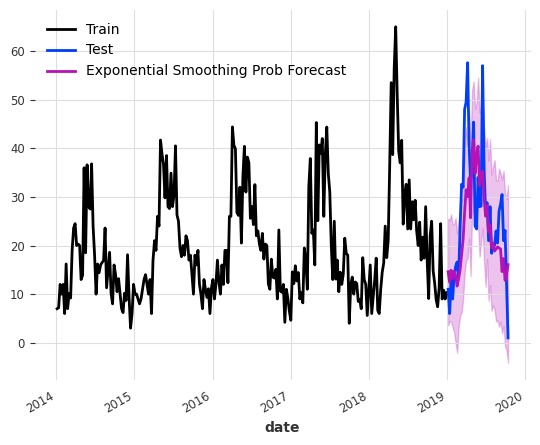

In [ ]:
# Exponential Smoothing (probabilistic)
model_es_prob = ExponentialSmoothing()
model_es_prob.fit(train)
pred_es_prob = model_es_prob.predict(41, num_samples=100)

train.plot(label="Train")
test.plot(label="Test")
pred_es_prob.plot(label="Exponential Smoothing Prob Forecast")

We have now generated a probabilistic prediction for 41 future time steps with 100 samples for each time step. To explore the nature of these predictions, we now examine the Darts TimeSeries object containing the probabilistic predictions made using NBEATS.

In [ ]:
# print prediction (probabilistic)
pred_es_prob

<TimeSeries (DataArray) (date: 41, component: 1, sample: 100)>
array([[[25.39551047, 16.59237359, 20.32677049, ..., 25.53633372,
         14.82873789, 16.60419907]],

       [[27.27235356,  4.69972879,  5.92771289, ..., 20.46046044,
         27.01673628, 22.02752389]],

       [[16.94094644, 11.98759286, 21.45691619, ..., 21.77837088,
         15.03519856, 19.30663925]],

       ...,

       [[-4.02650619,  4.88605308,  6.45316895, ..., 12.11092892,
          8.64042071, 22.8195476 ]],

       [[-7.99003909,  0.82947978, 16.86996505, ..., 14.0519648 ,
         15.45521446,  9.62035704]],

       [[ 2.71083342, 19.87892012, 21.71650284, ..., 16.55054665,
          8.93908027,  7.46983067]]])
Coordinates:
  * date       (date) datetime64[ns] 2019-01-06 2019-01-13 ... 2019-10-13
  * component  (component) object 'sold_qty'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### Parametric vs. Non-Parametric Models

For neural network models, Darts offer extensive support for estimating various probability distributions. When configuring the model, users can specify one of the likelihood models available in darts.utils.likelihood_models, which determines the type of distribution the model will estimate. In this setup, the model outputs the parameters of the chosen distribution and is trained by minimizing the negative log-likelihood of the training samples. These models are trained using a so-called parametric framework.

We will now train NBEATS using Poisson Likelihood. The Poisson distribution is commonly used to model count data, making it well-suited for situations where the outcome represents the number of occurrences within a fixed interval, such as weekly sales volumes. Since drug sales typically involve discrete quantities, such as the number of units sold per week, the Poisson Likelihood model is a natural choice for capturing the inherent variability and patterns in such data. By leveraging the Poisson Likelihood model in training NBEATS, we can effectively model the count-based nature of drug sales, enabling more accurate and interpretable forecasting results.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
25.662    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

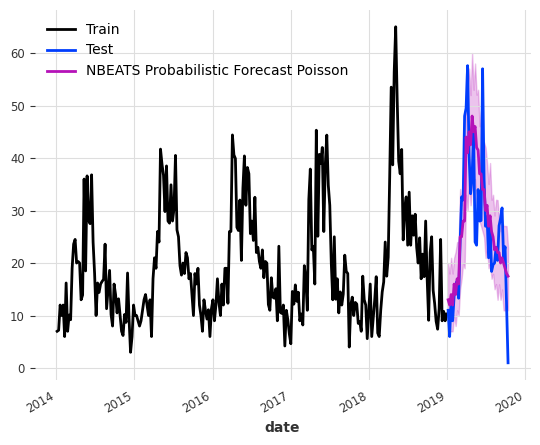

In [ ]:
# NBEATS parametric
model_nbeats_prob = NBEATSModel(input_chunk_length=52, output_chunk_length=4, likelihood=PoissonLikelihood())
model_nbeats_prob.fit(train, epochs=5, verbose=True)

pred_neats_prob = model_nbeats_prob.predict(41, num_samples=100)

train.plot(label="Train")
test.plot(label="Test")
pred_neats_prob.plot(label="NBEATS Probabilistic Forecast (Parametric)")

Additionally, Darts supports quantile regression with neural networks through the use of darts.utils.likelihood_models.QuantileRegression. This approach utilizes the pinball loss function during training, allowing the network to estimate arbitrary quantiles of the target distribution. Unlike parametric likelihood models, quantile regression offers a non-parametric approach to modeling uncertainty, making it a viable option when the true distribution is uncertain or when fitting parametric models yields unsatisfactory results. By leveraging quantile regression, practitioners can obtain a flexible and data-driven approach to forecasting, with the number of network outputs dynamically adjusted to match the desired quantiles.

**Task** <br>
*Train NBEATS using the non-parametric approach. To do so, specify QuantileRegression() as likelihood. Choose the same input_chunk_length, output_chunk_length, and number of epochs and samples as above.*

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 7.0 M 
---------------------------------------------------
7.0 M     Trainable params
1.6 K     Non-trainable params
7.0 M     Total params
28.129    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

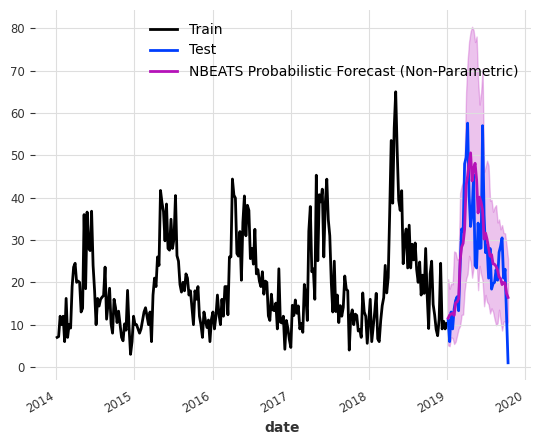

In [ ]:
# NBEATS non-parametric
# model_nbeats_prob = ...

# fit model
# model_nbeats_prob...

# create prediction
#pred_neats_prob = ...

# plot results
# ...
# label="NBEATS Probabilistic Forecast (Non-Parametric)"

Parametric methods make assumptions about the underlying distribution of the data and estimate parameters to fit this distribution, whereas non-parametric methods do not make explicit assumptions about the distribution and instead rely on the data itself to determine the underlying structure. Parametric methods may offer simplicity and interpretability but can be limited by their assumptions, while non-parametric methods provide flexibility and adaptability to diverse data distributions but may require larger datasets for accurate estimation.

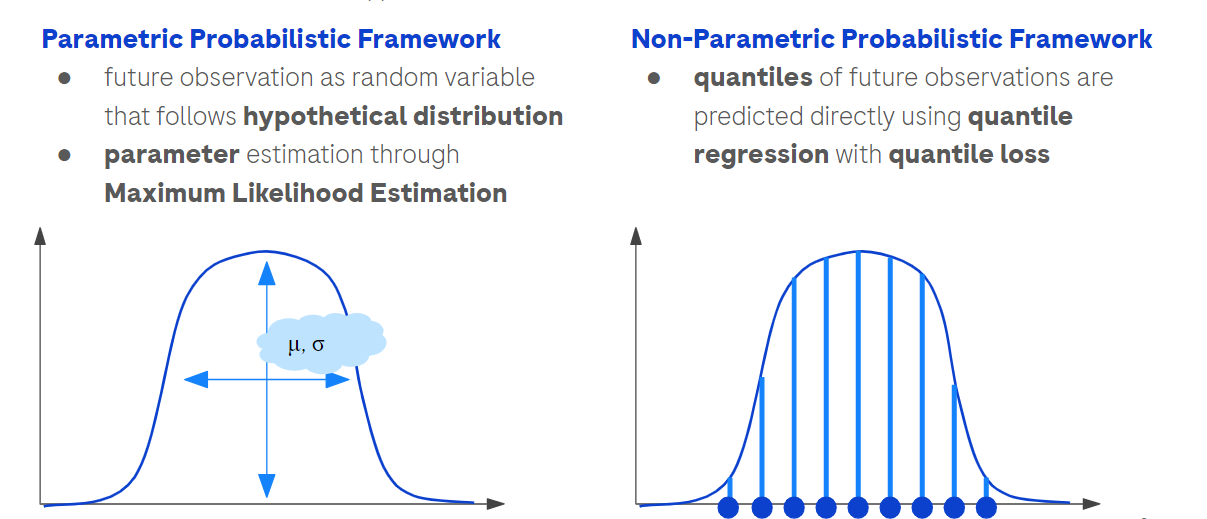

### Hyperparameter Optimization and Model Exploration

We will now continue exploring various probabilistic forecasting models offered by Darts including Transformer, Temporal Convolutional Network (TCN), and DeepAR. These models offer unique advantages in capturing complex temporal patterns and dependencies present in time series data. The Transformer model, originally designed for natural language processing, excels in capturing long-range dependencies and has been adapted successfully for time series forecasting. TCN, on the other hand, is renowned for its ability to capture local and global dependencies efficiently through a series of convolutional layers, making it particularly effective for modeling sequential data. Lastly, DeepAR leverages recurrent neural networks (RNNs) and autoregressive techniques to capture both short-term and long-term dependencies, enabling accurate probabilistic forecasting. By leveraging these advanced models, we aim to harness their respective strengths to produce accurate and reliable forecasts across a variety of time series datasets.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 442   
---------------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.005     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

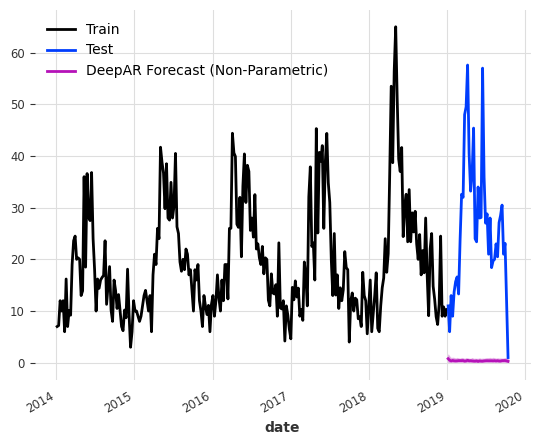

In [ ]:
# DeepAR non-parametric
model_rnn_prob = RNNModel(input_chunk_length=52,
                          likelihood=QuantileRegression(),
                          n_epochs=5,
                          random_state=42)
model_rnn_prob.fit(train, verbose=True)

pred_rnn_prob = model_rnn_prob.predict(41, num_samples=100)

train.plot(label="Train")
test.plot(label="Test")
pred_rnn_prob.plot(label="DeepAR Forecast (Non-Parametric)")

We see, that here we get a very bad prediction, that is severly underestimating the sales of R06. In order to increase model performance, we could perform hyperparameter tuning.

Hyperparameter tuning plays a critical role in optimizing the performance of machine learning models, including those used for time series forecasting. Proper tuning ensures that the model is configured to effectively capture the underlying patterns and relationships within the data, leading to more accurate and reliable forecasts.

The process of hyperparameter tuning involves systematically searching through a predefined space of hyperparameters and selecting the combination that yields the best performance metrics on a test set. This can be achieved through techniques such as grid search, random search, or more advanced optimization algorithms like Bayesian optimization.

To effectively tune hyperparameters, it is essential to define a suitable search space based on domain knowledge and experimentation. Additionally, cross-validation techniques should be employed to prevent overfitting and ensure the generalization of the selected hyperparameters to unseen data.

While hyperparameter tuning can be computationally expensive and time-consuming, the benefits of improved model performance and forecast accuracy justify the investment of time and resources. Ultimately, the success of hyperparameter tuning lies in its ability to fine-tune model configurations to better suit the characteristics of the time series data, leading to more robust and reliable forecasting models.

Due to time restrictions, we will here just explore a few changes in hyperparameter and visualize how they affect the result.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 442   
---------------------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.005     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

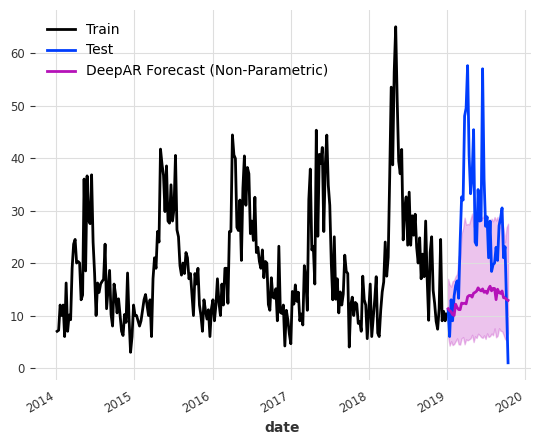

In [ ]:
# DeepAR non-parametric
model_rnn_prob = RNNModel(input_chunk_length=8,
                          model="RNN",
                          likelihood=QuantileRegression(),
                          training_length=104,
                          batch_size=8,
                          n_epochs=100,
                          random_state=42)
model_rnn_prob.fit(train, verbose=True)

pred_rnn_prob = model_rnn_prob.predict(41, num_samples=100)

train.plot(label="Train")
test.plot(label="Test")
pred_rnn_prob.plot(label="DeepAR Forecast (Non-Parametric)")

Below are two additional examples utilizing the Transformer model and TCN model, both of which have not yet been optimized. While these models hold promise in capturing complex temporal patterns and dependencies, their current configurations may not fully leverage their capabilities. Through optimization and tuning of hyperparameters, we aim to enhance the performance of these models and improve their forecasting accuracy. By systematically exploring the hyperparameter space and selecting the most effective configurations, we anticipate unlocking the full potential of the Transformer and TCN models for time series forecasting tasks.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 128   
4 | positional_encoding | _Posit

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

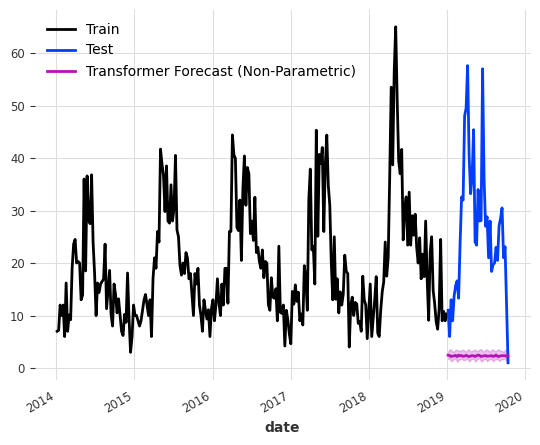

In [ ]:
model_transformer_prob = TransformerModel(input_chunk_length=52,
                                          output_chunk_length=4,
                                          likelihood=QuantileRegression())
model_transformer_prob.fit(train, epochs=5, verbose=True)

pred_transformer_prob = model_transformer_prob.predict(41, num_samples=100)

train.plot(label="Train")
test.plot(label="Test")
pred_transformer_prob.plot(label="Transformer Forecast (Non-Parametric)")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 436   
----------------------------------------------------
436       Trainable params
0         Non-trainable params
436       Total params
0.002     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

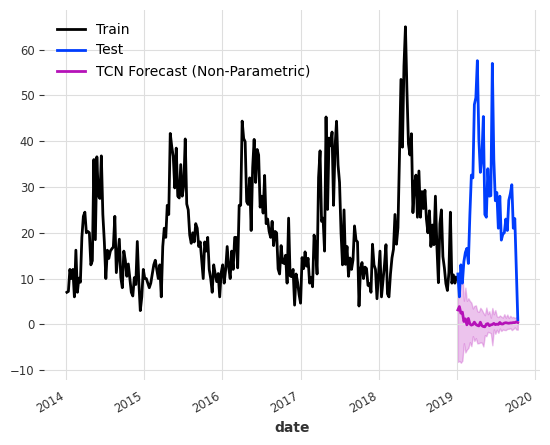

In [ ]:
from darts.models import TCNModel

model_tcn_prob = TCNModel(input_chunk_length=52, output_chunk_length=4, likelihood=QuantileRegression())
model_tcn_prob.fit(train, epochs=5, verbose=True)

pred_tcn_prob = model_tcn_prob.predict(41, num_samples=100)

train.plot(label="Train")
test.plot(label="Test")
pred_tcn_prob.plot(label="TCN Forecast (Non-Parametric)")

## Convert Forecast to DF

Having generated numerous probabilistic forecasts using various models, our next step is to convert(one of) these forecasts into a pandas DataFrame format. This conversion facilitates further analysis, particularly in evaluating forecast performance. By leveraging the rich functionality of pandas, we can easily compute evaluation metrics, visualize forecast distributions, and compare multiple forecasts to gain deeper insights into the accuracy and reliability of our predictions.

In [ ]:
def darts_op_to_df(ts):
    df = pd.DataFrame()
    for i in range(len(ts)):
        date = ts.get_timestamp_at_point(i)

        temp_df = pd.DataFrame()
        q_forecast = ts[i].all_values().flatten()
        df[date] = q_forecast
    cols = ['F'+str(i) for i in range(df.shape[0])] #F = Forecast
    df = df.T
    df.columns = cols
    return df

In [ ]:
df_pred_es_prob = darts_op_to_df(pred_es_prob)
df_pred_rnn_prob = darts_op_to_df(pred_rnn_prob)

In [ ]:
df_pred_es_prob.head()

In [ ]:
df_pred_rnn_prob.head()

In [ ]:
df_pred_es_prob.to_csv("ProbForecast_R06_ExponentialSmoothing.csv")
df_pred_rnn_prob.to_csv("ProbForecast_R06_DeepAR.csv")